In [50]:
## Step 1.1 – Loading the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns
from collections import Counter
file_path = "C://Users//Otowo//OneDrive//Desktop//Advanced Data Analytics DBMS260//Voting - Gambling - Data Set.xlsx"
df = pd.read_excel(file_path)

df.head()


,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,15607,34618,...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,13740,23114,...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,24187,44874,...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,12816,27359,...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,19017,23054,...,1.0,1192,220,1231,973,940,2,0.07,1913,2462


In [26]:
## Step 1.2 – Dimensions & structure
## Results show 1287 rows(counties) and 31 columns(demographic,economic,voting variables)
df.shape

(1287, 31)

In [27]:
## Step 1.3 – Data types
## Results show that most variables are int and float, some binary nominal variables are stored as numbers(Dependent variable, ballot type and MSA)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State No                              1287 non-null   int64  
 1   County No                             1287 non-null   int64  
 2   FOR                                   1287 non-null   int64  
 3   AGAINST                               1287 non-null   int64  
 4   TOTAL CASTE                           1287 non-null   int64  
 5   DEPENDENT VARIABLE                    1287 non-null   int64  
 6   BALLOT TYPE                           1287 non-null   int64  
 7   POPULATION                            1287 non-null   int64  
 8   PCI                                   1287 non-null   int64  
 9   MEDIUM FAMILY INCOME                  1287 non-null   int64  
 10  SIZE OF COUNTY                        1287 non-null   float64
 11  POPULATION DENSIT

In [ ]:
## Data Quality Checks (Errors & Anomalies)

In [28]:
## Step 2.1 Checking for missing Values
df.isnull().sum()


State No                                0
County No                               0
FOR                                     0
AGAINST                                 0
TOTAL CASTE                             0
DEPENDENT VARIABLE                      0
BALLOT TYPE                             0
POPULATION                              0
PCI                                     0
MEDIUM FAMILY INCOME                    0
SIZE OF COUNTY                          0
POPULATION DENSITY                      0
PERCENT WHITE                           0
PERCENT BLACK                           0
PERCENT OTHER                           0
PERCENT MALE                            0
PERCENT FEMALE                          0
NO OF CHURCHES                          0
NO OF CHURCH MEMBERS                    1
PERCENT CHURCH MEMBERS OF POPULATION    1
POVERTY LEVEL                           0
UNEMPLOYMENT RATE                       0
AGE LESS THAN 18                        0
AGE24                             

In [29]:
## 2.2 Logical Consistency Checks (Vote Total)
df["VOTE_CHECK"] = df["FOR"] + df["AGAINST"] - df["TOTAL CASTE"]
df["VOTE_CHECK"].value_counts()


VOTE_CHECK
0    1287
Name: count, dtype: int64

In [30]:
## Remedy and Recalculating TOTAL CASTE
df["TOTAL CASTE"] = df["FOR"] + df["AGAINST"]
df.drop(columns="VOTE_CHECK", inplace=True)


In [31]:
## Step 2.3 Validate Derived Percentage Variables( Race composition)
## Result shows Anomaly like some counties ≠ 1.0, caused by rounding or incorrect derivation.
df["RACE_SUM"] = (
    df["PERCENT WHITE"] +
    df["PERCENT BLACK"] +
    df["PERCENT OTHER"]
)

df["RACE_SUM"].describe()


count    1287.000000
mean        0.999977
std         0.002030
min         0.990000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.010000
Name: RACE_SUM, dtype: float64

In [ ]:
##  Remedy: Re-normalize percentages

In [32]:
race_total = df["RACE_SUM"]
df["PERCENT WHITE"] /= race_total
df["PERCENT BLACK"] /= race_total
df["PERCENT OTHER"] /= race_total

df.drop(columns="RACE_SUM", inplace=True)


In [ ]:
## 2.4 Population vs Age Groups Check
## Result shows small inconsistencies found (rounding / census timing).

In [33]:
df["AGE_SUM"] = (
    df["AGE LESS THAN 18"] +
    df["AGE24"] +
    df["AGE44"] +
    df["AGE64"] +
    df["AGE OLDER THAN 65"]
)

(df["AGE_SUM"] - df["POPULATION"]).describe()


count      1287.000000
mean        699.316239
std       34796.336847
min     -430128.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      799008.000000
dtype: float64

In [ ]:
## Remedy: Keep population as authoritative

In [11]:
df.drop(columns="AGE_SUM", inplace=True)


In [ ]:
## 2.5 Outlier Detection (Economic Variables)

In [12]:
df[["PCI", "MEDIUM FAMILY INCOME"]].describe()


,PCI,MEDIUM FAMILY INCOME
count,1287.000000,1287.000000
mean,16652.771562,27398.725719
std,3827.951391,6403.965308
min,5720.000000,12225.000000
25%,14204.000000,22907.000000
50%,16177.000000,26508.000000
75%,18582.500000,31060.500000
max,44518.000000,55643.000000


In [34]:
## Detect extreme PCI values
df[df["PCI"] > df["PCI"].quantile(0.99)]


,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER,AGE_SUM
48,1,49,1820,2017,3837,0,1,12661,31633,52976,...,2208,1051,6434,2411,557,2,0.050000,2968,12868,12661
259,5,27,1115,4536,5651,0,1,11985,31080,38297,...,2420,425,3528,3071,2417,2,0.037368,5488,7056,11861
296,7,25,2606,4480,7086,0,1,11985,31080,38297,...,2420,425,3522,3159,2459,2,0.037890,5618,7044,11985
316,8,9,15777,38665,54442,0,1,176351,32123,33722,...,37198,12154,45992,37348,43875,1,0.202541,81223,91984,176567
334,8,27,11749,24775,36524,0,1,95089,29257,29580,...,11354,4498,12978,8766,6233,2,0.324078,14999,25956,43829
358,8,51,34100,92667,126767,0,1,291831,30763,30710,...,48806,15897,68228,63386,95513,1,0.080879,158899,136456,291830
468,9,101,472,366,838,1,2,3635,30296,37577,...,1048,194,990,819,584,2,0.067675,1403,1980,3635
575,9,208,345,259,604,1,2,2856,33813,31714,...,836,206,778,626,410,2,0.196010,1036,1556,2856
1263,18,22,23542,18671,42213,1,1,119540,32649,44667,...,28896,9390,34840,26190,20224,1,0.240000,46414,69680,119540
1265,18,24,35907,49188,85095,0,1,229216,32319,49638,...,61797,14766,72774,52622,27257,1,0.130000,79879,145548,229216


In [ ]:
## Remedy:Winsorization

In [35]:
df["PCI"] = df["PCI"].clip(
    lower=df["PCI"].quantile(0.01),
    upper=df["PCI"].quantile(0.99)
)


In [ ]:
## 3.0 Data Transformation (Analytics-Ready)

In [36]:
## 3.1 Convert Nominal Variables
categorical_cols = [
    "DEPENDENT VARIABLE",
    "BALLOT TYPE",
    "MSA"
]

for col in categorical_cols:
    df[col] = df[col].astype("category")


In [37]:
## 3.2 Creating New Useful Features(Voter Turnout Rate)
df["TURNOUT_RATE"] = df["TOTAL CASTE"] / df["POPULATION"]


In [38]:
## Approval Rate
df["FOR_RATE"] = df["FOR"] / df["TOTAL CASTE"]


In [ ]:
## 3.3 Remove Unused / Redundant Variables

In [40]:
final_df = df.drop(columns=[
    "State No",
    "County No"
])


In [ ]:
## 4.0 Final Data Summary (After Preprocessing)

In [41]:
final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1287 entries, 0 to 1286
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   FOR                                   1287 non-null   int64   
 1   AGAINST                               1287 non-null   int64   
 2   TOTAL CASTE                           1287 non-null   int64   
 3   DEPENDENT VARIABLE                    1287 non-null   category
 4   BALLOT TYPE                           1287 non-null   category
 5   POPULATION                            1287 non-null   int64   
 6   PCI                                   1287 non-null   float64 
 7   MEDIUM FAMILY INCOME                  1287 non-null   int64   
 8   SIZE OF COUNTY                        1287 non-null   float64 
 9   POPULATION DENSITY                    1287 non-null   float64 
 10  PERCENT WHITE                         1287 non-null   float64 
 11  PERC

In [42]:
## Exporting File
final_df.to_csv(r"C:\Users\Otowo\OneDrive\Documents\Voting_Gambling_Cleaned.csv", index=False)


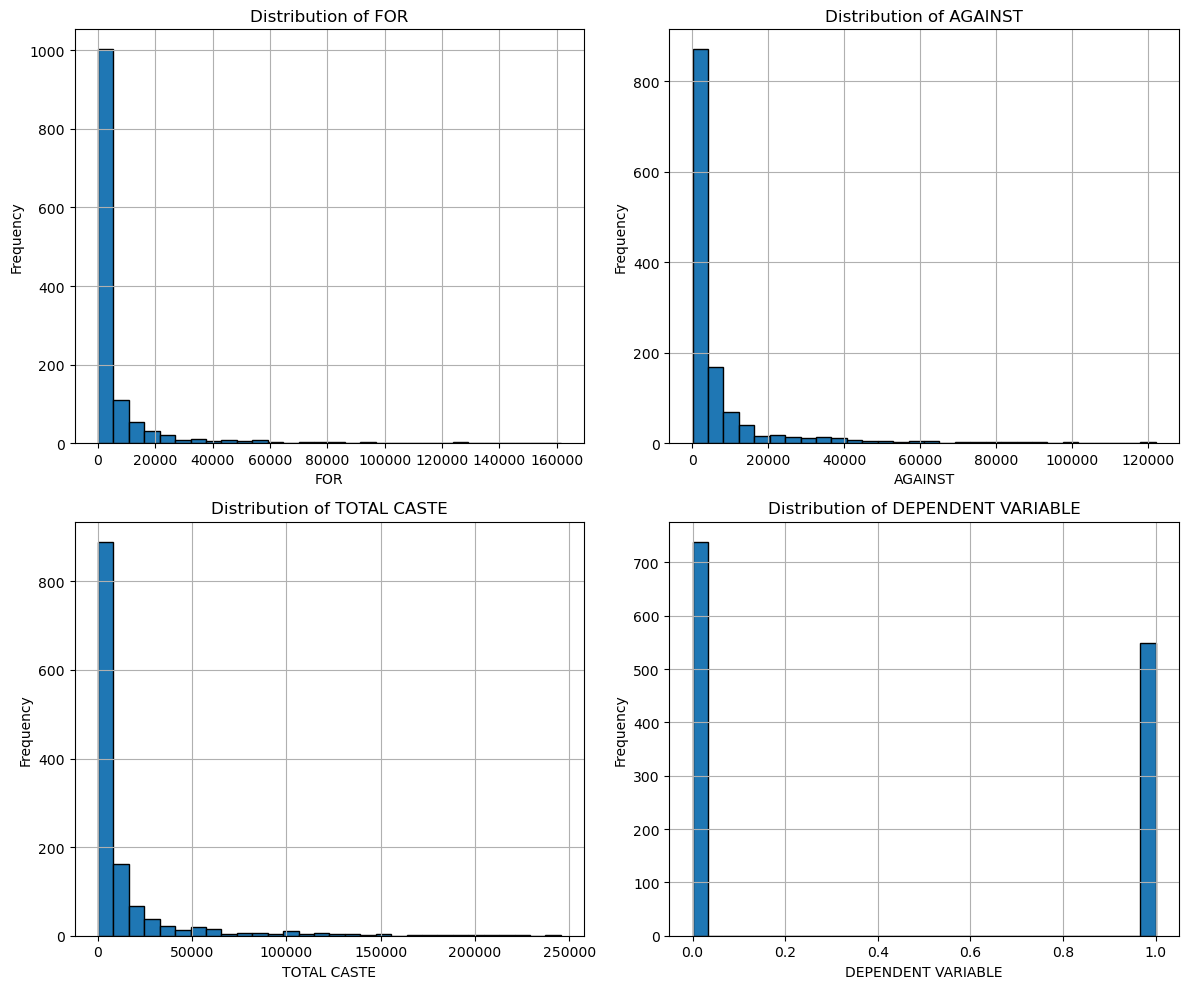

In [48]:
##4.1 Visualizations

# df_clean = pd.read_csv('your_data.csv')  # or however you're supposed to create df_clean



# Loading data here
df_clean = pd.read_csv(r'C:\Users\Otowo\OneDrive\Documents\Voting_Gambling_Cleaned.csv') 


numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

# Then proceeding with visualization
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Distribution plots for numeric columns
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
for idx, col in enumerate(numeric_cols[:4]):
    ax = axes[idx // 2, idx % 2]
    df_clean[col].hist(ax=ax, bins=30, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [52]:
# 4.2 Correlation analysis
print("\nCorrelation Matrix:")
correlation_matrix = df_clean.corr(numeric_only=True)
print(correlation_matrix)


Correlation Matrix:
                                           FOR   AGAINST  TOTAL CASTE  \
FOR                                   1.000000  0.812438     0.950852   
AGAINST                               0.812438  1.000000     0.953047   
TOTAL CASTE                           0.950852  0.953047     1.000000   
DEPENDENT VARIABLE                    0.109404 -0.115596    -0.004568   
BALLOT TYPE                          -0.169330 -0.266341    -0.229396   
POPULATION                            0.864461  0.829137     0.889324   
PCI                                   0.429148  0.475245     0.475285   
MEDIUM FAMILY INCOME                  0.413906  0.451879     0.454960   
SIZE OF COUNTY                        0.044976  0.043120     0.046260   
POPULATION DENSITY                    0.777529  0.629724     0.738268   
PERCENT WHITE                        -0.091088  0.025161    -0.033947   
PERCENT BLACK                         0.095536  0.022711     0.061681   
PERCENT OTHER                 

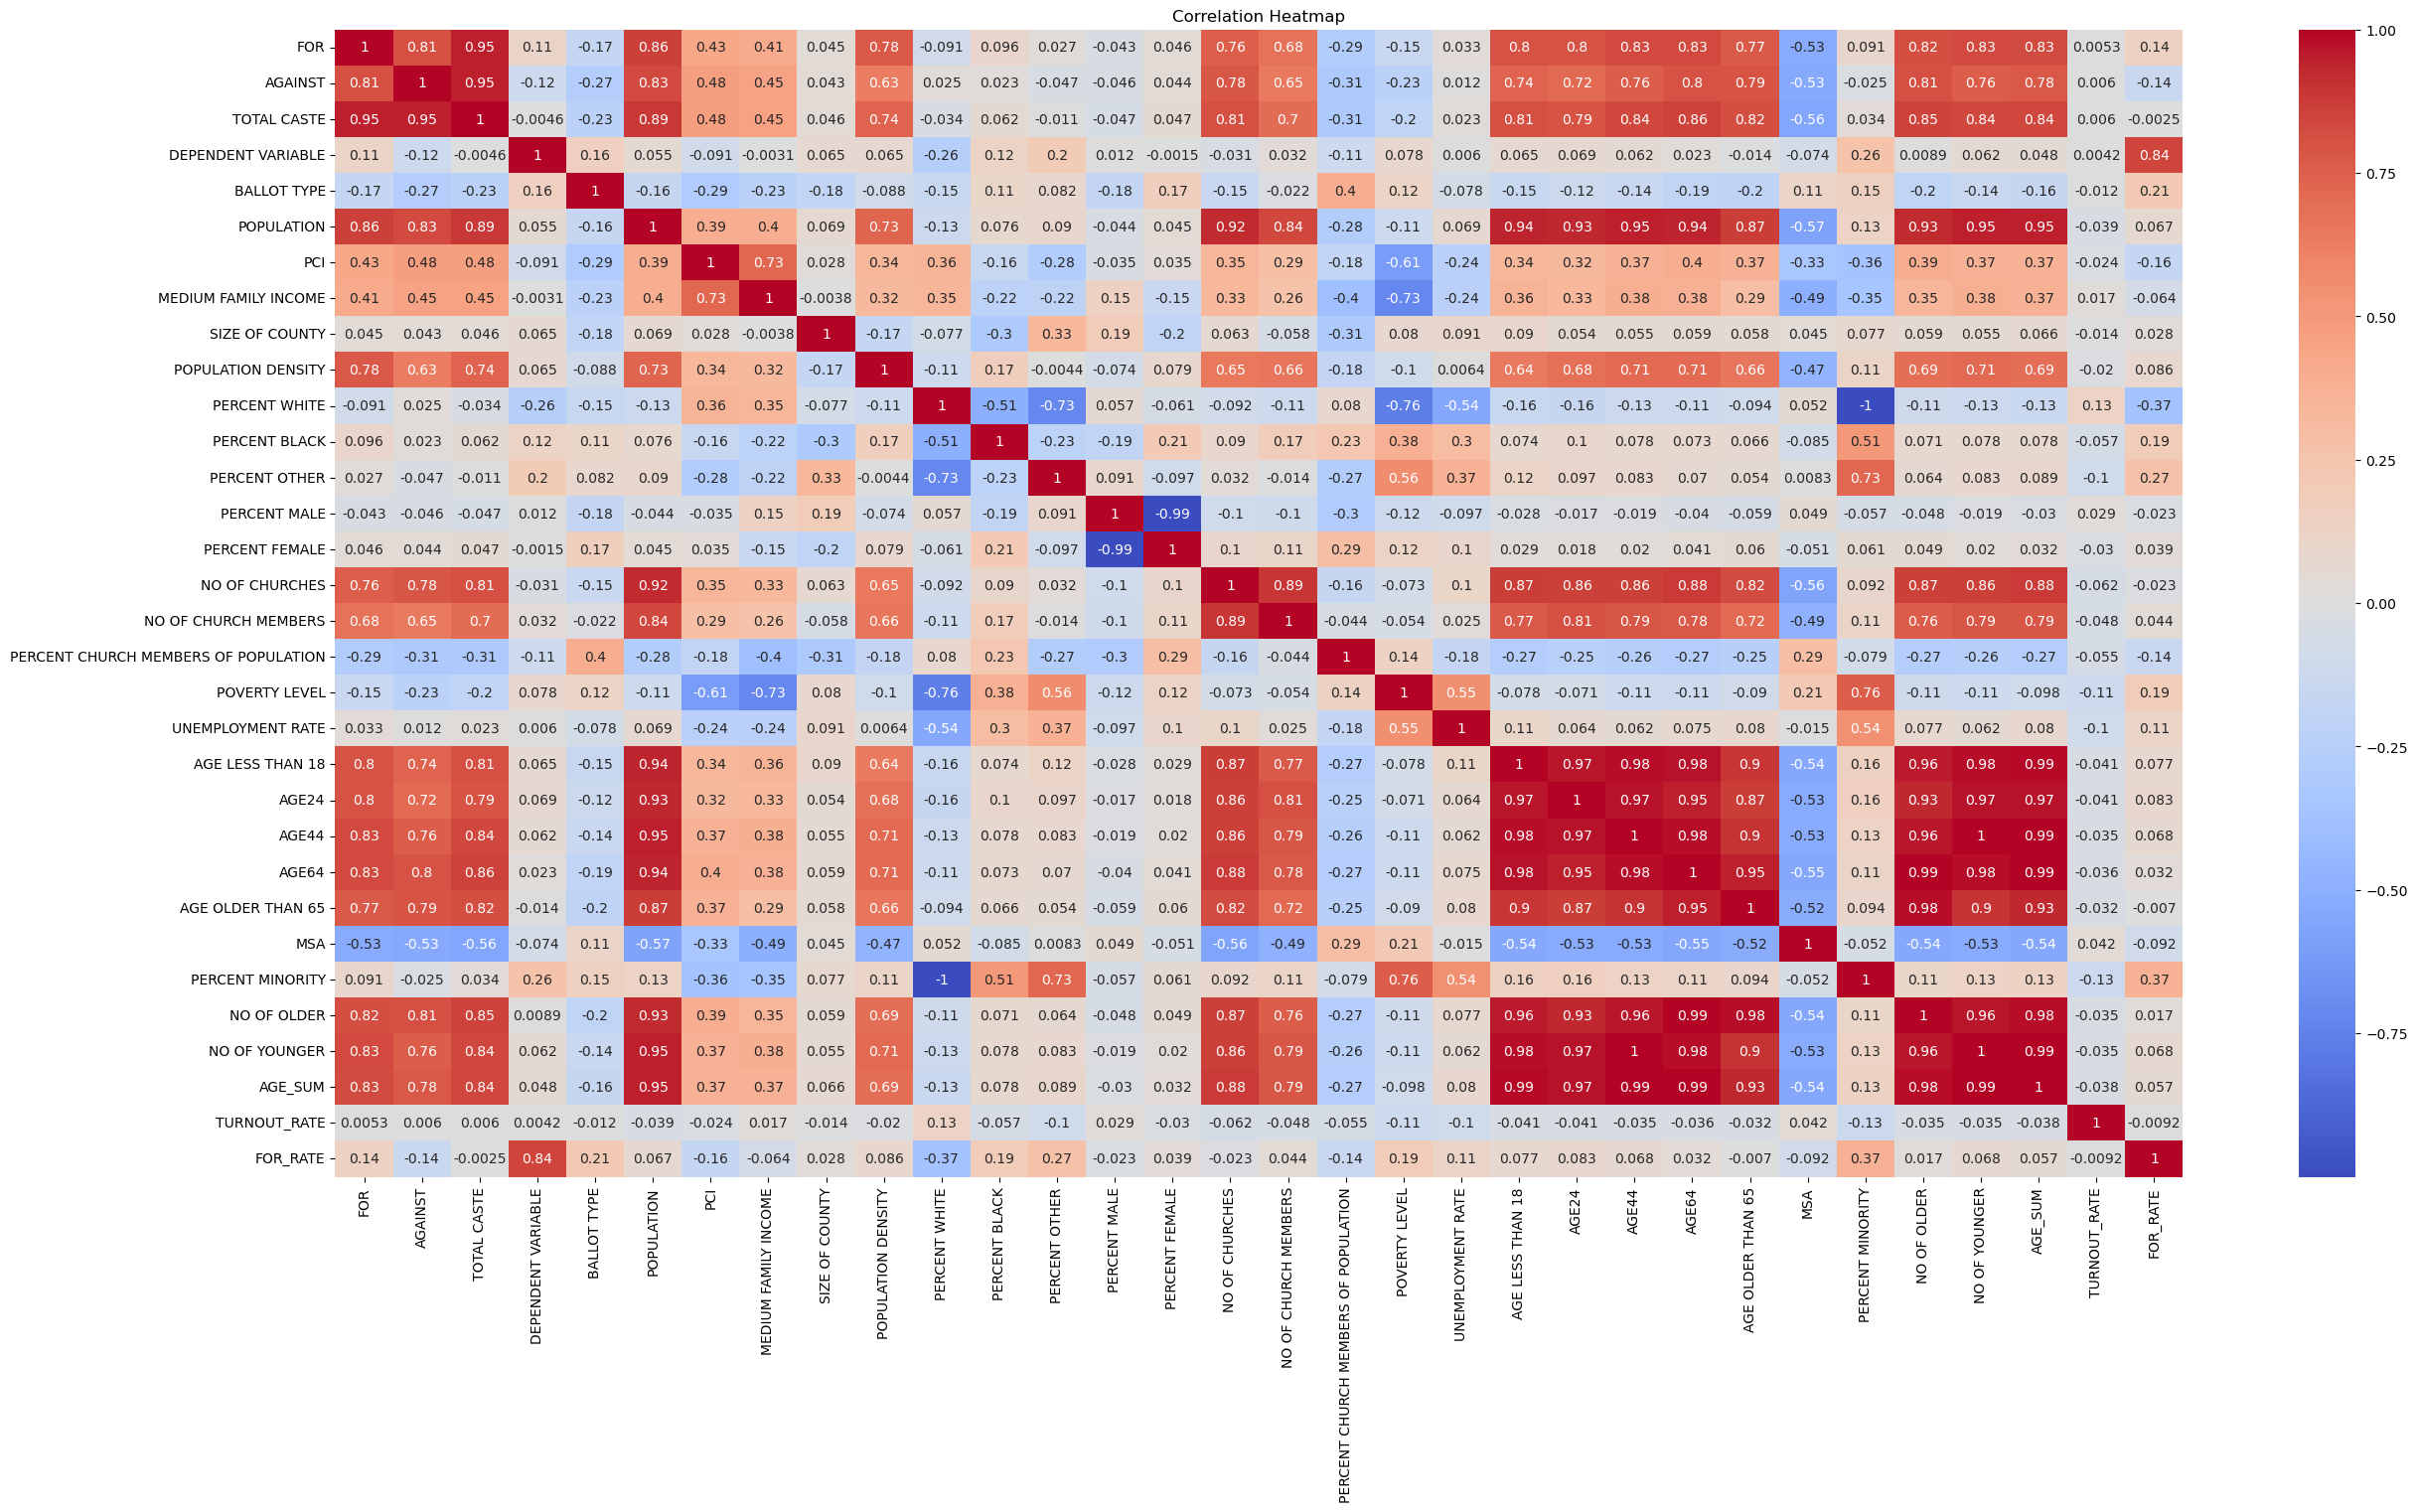

In [53]:
# 4.3 Heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()